# Prophetのモデルの中身
Prophetがどのようにしてモデルを作成しているのか、もう少し詳細に見てみます。

```{admonition} 参考文献
Taylor, Sean J., and Benjamin Letham. "Forecasting at scale." The American Statistician 72.1 (2018): 37-45.
```

In [1]:
# Google　Colaboratory で実行する場合はインストールする
if str(get_ipython()).startswith("<google.colab."):
    !pip install japanize_matplotlib
    !pip install prophet

In [2]:
import numpy as np
import pandas as pd
import random
import seaborn as sns
import matplotlib.pyplot as plt
import japanize_matplotlib
from prophet import Prophet

In [3]:
# グラフの表示パラメタ
sns.set(
    rc={
        "figure.figsize": (12, 4),
        "legend.fontsize": "large",
        "figure.titlesize": "large",
        "axes.titlesize": 20,
    }
)
japanize_matplotlib.japanize()
np.random.seed(777)

## 実験に使用するデータ
１年間のデータを用意します。このデータには以下の特徴があります。

- 2020/1/1 ~ 2020/12/31 の期間のデータ
- 週ごとに周期的な数値を取る
- 土日は大きな値をとる
- 不定期にイベントが発生し、その時は非常に大きな値を取る(`horidays_index`に該当する日付を指しています)

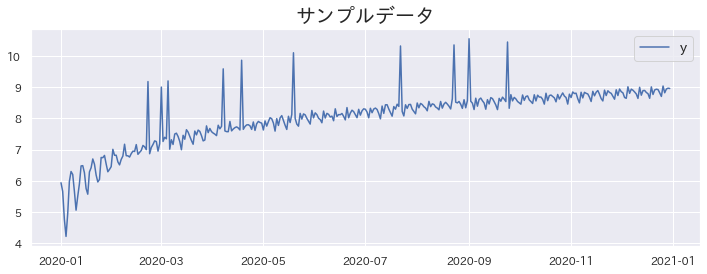

In [4]:
date = pd.date_range("2020-01-01", periods=365, freq="D")
horidays_index = random.sample([i for i in range(365)], 10)
y = [
    np.log(10 + i + 10 * np.cos(i))  # トレンド
    + np.cos(di.weekday() * np.pi / 28) * 3  # 週ごとに周期性あり
    + (di.weekday() in {5, 6}) * 0.5  #       〃
    + (i in horidays_index) * 2  # 祝日だけ数値を増やす
    + np.random.rand() / 10  # ノイズ
    for i, di in enumerate(date)
]

df = pd.DataFrame({"ds": date, "y": y})
df.index = date

plt.title("サンプルデータ")
sns.lineplot(data=df)
plt.show()

## トレンドの指定
### growth="linear"

Initial log joint probability = -2.99674
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1040.17   0.000845008       95.4398      0.3546      0.3546      128   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     166       1045.08   8.28451e-05       66.0092   1.087e-06       0.001      252  LS failed, Hessian reset 
     184       1045.09   1.58284e-05       61.1258   3.535e-07       0.001      307  LS failed, Hessian reset 
     199       1045.09   1.20349e-07        45.161      0.0243           1      330   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     264       1045.71   0.000316932       140.641   3.665e-06       0.001      456  LS failed, Hessian reset 
     292       1045.82   5.70302e-05       48.9256   1.155e-06       0.001      533  LS failed, Hessian reset 
     299       1045.82   7.71897e-06       40.8043      0.3543   

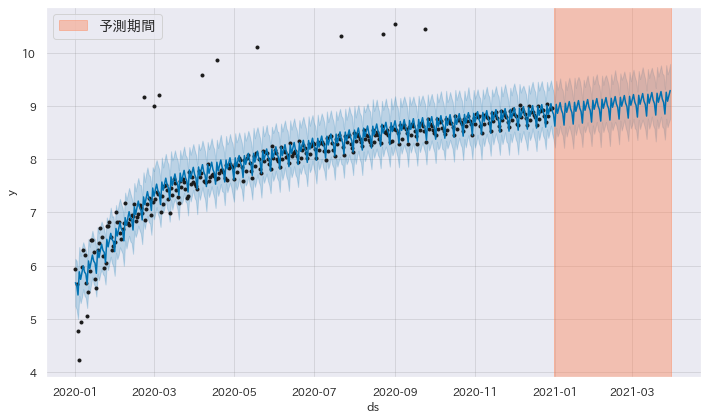

In [5]:
# モデルを作成
m = Prophet(
    yearly_seasonality=False,
    weekly_seasonality=True,
    daily_seasonality=False,
    growth="linear",
)
m.fit(df)

# 将来を予測
future = m.make_future_dataframe(periods=90)
forecast = m.predict(future)
fig = m.plot(forecast)
plt.axvspan(18627, 18627 + 90, color="coral", alpha=0.4, label="予測期間")
plt.legend()
plt.show()

### growth="flat"

Initial log joint probability = -3.30635
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
       8       725.322    0.00030891     0.0789655       0.955       0.955       14   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


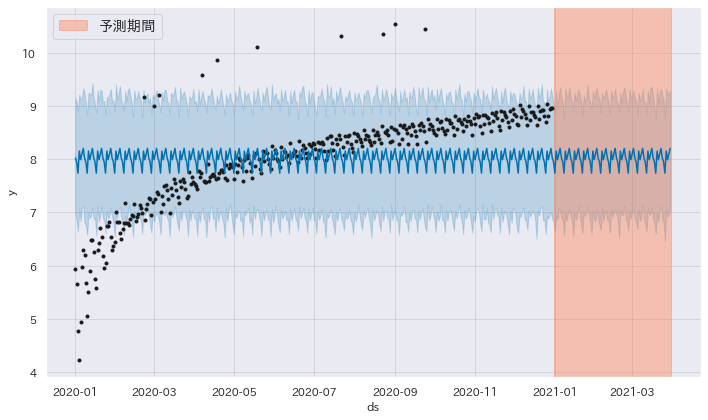

In [6]:
# モデルを作成
m = Prophet(
    yearly_seasonality=False,
    weekly_seasonality=True,
    daily_seasonality=False,
    growth="flat",
)
m.fit(df)

# 将来を予測
future = m.make_future_dataframe(periods=90)
forecast = m.predict(future)
fig = m.plot(forecast)
plt.axvspan(18627, 18627 + 90, color="coral", alpha=0.4, label="予測期間")
plt.legend()
plt.show()

## 季節変化の指定
### seasonalityが全てFalse

Initial log joint probability = -2.99674
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1014.78   0.000250992       97.5427       1.468     0.01468      134   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199          1020    0.00045602       60.8104           1           1      268   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     208        1020.1   0.000167489       76.8606   1.772e-06       0.001      314  LS failed, Hessian reset 
     299       1020.33   0.000353008       41.1849        2.43       0.243      446   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     352       1020.86   8.23232e-05       43.9782   1.438e-06       0.001      586  LS failed, Hessian reset 
     399       1020.99   0.000244078        56.987           1           1      657   
    Iter      log pro

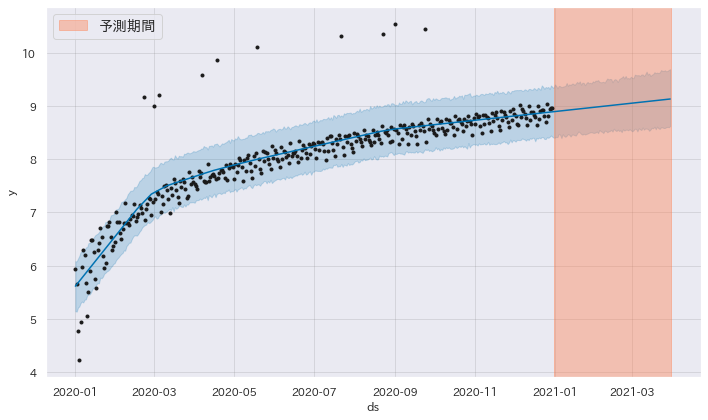

In [7]:
# モデルを作成
m = Prophet(
    yearly_seasonality=False,
    weekly_seasonality=False,
    daily_seasonality=False,
    growth="linear",
)
m.fit(df)

# 将来を予測
future = m.make_future_dataframe(periods=90)
forecast = m.predict(future)
fig = m.plot(forecast)
plt.axvspan(18627, 18627 + 90, color="coral", alpha=0.4, label="予測期間")
plt.legend()
plt.show()

### weekly_seasonality=True

Initial log joint probability = -2.99674
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1040.17   0.000845008       95.4398      0.3546      0.3546      128   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     166       1045.08   8.28451e-05       66.0092   1.087e-06       0.001      252  LS failed, Hessian reset 
     184       1045.09   1.58284e-05       61.1258   3.535e-07       0.001      307  LS failed, Hessian reset 
     199       1045.09   1.20349e-07        45.161      0.0243           1      330   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     264       1045.71   0.000316932       140.641   3.665e-06       0.001      456  LS failed, Hessian reset 
     292       1045.82   5.70302e-05       48.9256   1.155e-06       0.001      533  LS failed, Hessian reset 
     299       1045.82   7.71897e-06       40.8043      0.3543   

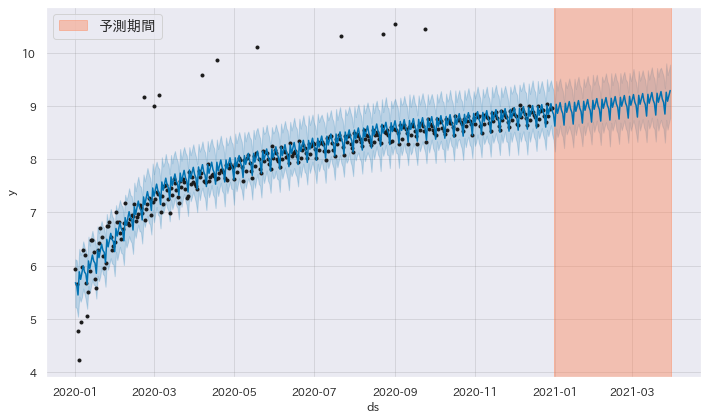

In [8]:
# モデルを作成
m = Prophet(
    yearly_seasonality=False,
    weekly_seasonality=True,
    daily_seasonality=False,
    growth="linear",
)
m.fit(df)

# 将来を予測
future = m.make_future_dataframe(periods=90)
forecast = m.predict(future)
fig = m.plot(forecast)
plt.axvspan(18627, 18627 + 90, color="coral", alpha=0.4, label="予測期間")
plt.legend()
plt.show()

### yearly_seasonality=True

Initial log joint probability = -2.99674
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1076.96   1.35095e-06        94.027      0.3775      0.3775      136   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     125       1076.96   2.65686e-06        89.152   2.895e-08       0.001      203  LS failed, Hessian reset 
     164       1076.96   2.28191e-08       91.6592      0.4114      0.4114      258   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


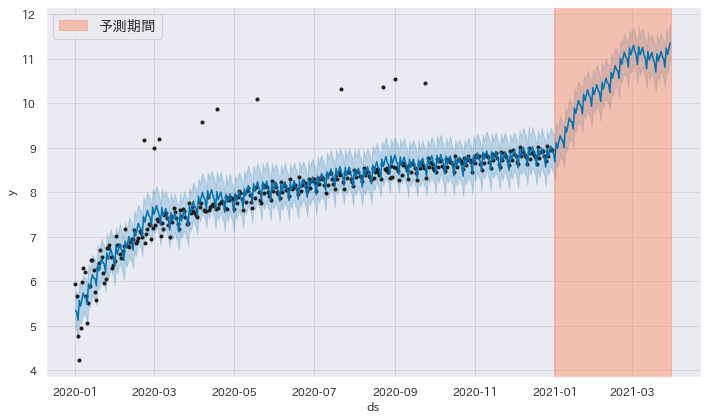

In [9]:
# モデルを作成
m = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=True,
    growth="linear",
)
m.fit(df)

# 将来を予測
future = m.make_future_dataframe(periods=90)
forecast = m.predict(future)
fig = m.plot(forecast)
plt.axvspan(18627, 18627 + 90, color="coral", alpha=0.4, label="予測期間")
plt.legend()
plt.show()

## 休日・イベント効果
### 休日・イベントの指定なし(`holidays=None`)

Initial log joint probability = -2.99674
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1040.17   0.000845008       95.4398      0.3546      0.3546      128   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     166       1045.08   8.28451e-05       66.0092   1.087e-06       0.001      252  LS failed, Hessian reset 
     184       1045.09   1.58284e-05       61.1258   3.535e-07       0.001      307  LS failed, Hessian reset 
     199       1045.09   1.20349e-07        45.161      0.0243           1      330   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     264       1045.71   0.000316932       140.641   3.665e-06       0.001      456  LS failed, Hessian reset 
     292       1045.82   5.70302e-05       48.9256   1.155e-06       0.001      533  LS failed, Hessian reset 
     299       1045.82   7.71897e-06       40.8043      0.3543   

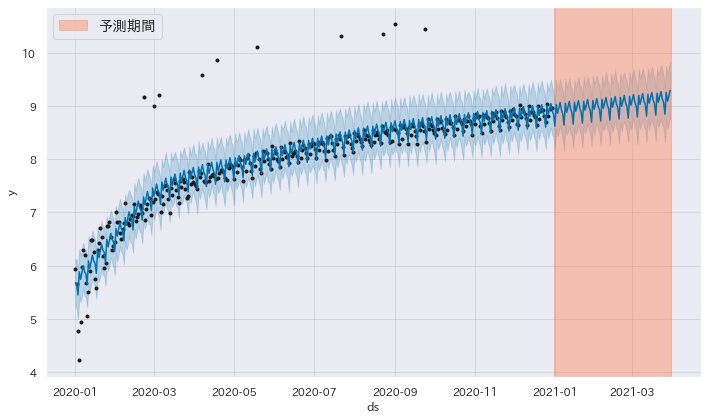

In [10]:
# モデルを作成
m = Prophet(
    yearly_seasonality=False,
    weekly_seasonality=True,
    daily_seasonality=False,
    growth="linear",
    holidays=None,  # 休日・イベントの指定なし
)
m.fit(df)

# 将来を予測
future = m.make_future_dataframe(periods=90)
forecast = m.predict(future)
fig = m.plot(forecast)
plt.axvspan(18627, 18627 + 90, color="coral", alpha=0.4, label="予測期間")
plt.legend()
plt.show()

### 休日・イベントの指定あり

Initial log joint probability = -2.99674
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1343.59    0.00181622       336.302      0.9914      0.9914      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1366.61    0.00129331       915.041      0.2388      0.9805      232   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     265       1372.99   0.000111116       289.963   4.926e-07       0.001      351  LS failed, Hessian reset 
     299       1374.36    0.00236219       89.8611           1           1      393   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       1375.61    0.00707432       82.6526           1           1      509   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     431       1375.93   8.82293e-05    

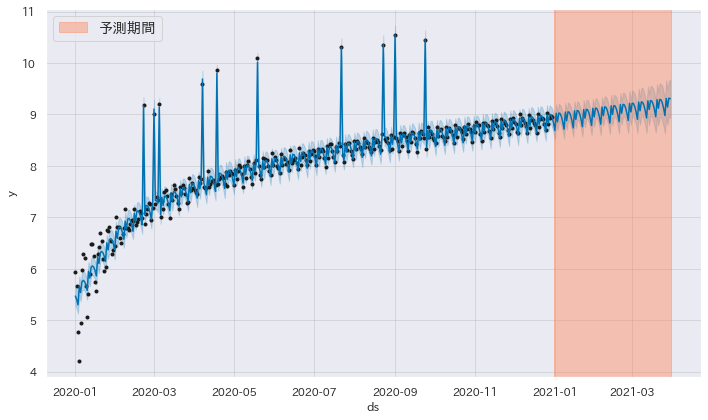

In [11]:
# モデルを作成
df_holidays = pd.DataFrame(
    {"holiday": "event", "ds": [di for i, di in enumerate(date) if i in horidays_index]}
)

m = Prophet(
    yearly_seasonality=False,
    weekly_seasonality=True,
    daily_seasonality=False,
    growth="linear",
    holidays=df_holidays,  # 休日・イベントの指定あり
)
m.fit(df)

# 将来を予測
future = m.make_future_dataframe(periods=90)
forecast = m.predict(future)
fig = m.plot(forecast)
plt.axvspan(18627, 18627 + 90, color="coral", alpha=0.4, label="予測期間")
plt.legend()
plt.show()